# Grain Facet project:

## Plot facet angle as a function of dimensionless disturbance rate and weathering (or dissolution) rate

In [1]:
import csv
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Read in data from 124 model runs that have already been compiled into a .csv file. Read into arrays for the disturbance-rate parameter, the weathering-rate parameter, and the resulting facet slope angle.

In [2]:
filename = 'slope_analysis20180826.csv'

In [3]:
# Count number of lines in file
num_lines = len(open(filename).readlines(  ))

# Create data arrays
dist_param = np.zeros(num_lines - 1)  # skip 1 header line
weath_param = np.zeros(num_lines - 1)
facet_angle = np.zeros(num_lines - 1)

# Read data
with open(filename, 'r') as csvfile:
    myreader = csv.reader(csvfile)
    i = 0
    for row in myreader:
        print(', '.join(row))
        if i >= 1:
            dist_param[i-1] = row[1]
            weath_param[i-1] = row[2]
            facet_angle[i-1] = row[3]
        i += 1

Run name, Disturbance rate parameter, Weathering rate parameter, Slope angle, Slope gradient
d-30w-23, 0.001, 0.00501187233627, 29.0636804385, 0.555762878404
d-40w-36, 0.0001, 0.000251188643151, 48.7387796742, 1.13983109863
d-40w-31, 0.0001, 0.000794328234724, 35.5636262297, 0.714969885448
d-30w-24, 0.001, 0.00398107170553, 28.5455444664, 0.54398538265
d-40w-38, 0.0001, 0.000158489319246, 51.6253692569, 1.26283425238
d-30w-12, 0.001, 0.063095734448, 28.8849563451, 0.55168713405
d-30w-15, 0.001, 0.0316227766017, 28.7180031788, 0.547892475513
d-30w-14, 0.001, 0.0398107170553, 28.7539123029, 0.548707624384
d-40w-39, 0.0001, 0.000125892541179, 53.5138751285, 1.35210710802
d-30w-13, 0.001, 0.0501187233627, 28.6312243124, 0.545924874791
d-30w-25, 0.001, 0.00316227766017, 28.7390563482, 0.548370321403
d-40w-30, 0.0001, 0.001, 34.147478064, 0.67826007768
d-40w-37, 0.0001, 0.000199526231497, 50.4526909383, 1.21105824479
d-30w-22, 0.001, 0.0063095734448, 28.1363461643, 0.534765767835
d-30w-40, 0

Convert the data into a pandas DataFrame. This allows us to sort the data set according to $d'$ and $w'$, which in turn will make it possible to turn the data into 4 x 31 array in which each row represents one set of experiments at a fixed value of $d'$.

In [4]:
import pandas as pd

In [5]:
tau = 500.0  # average interval between slips of one cell, years (= tau_s, or "model input tau", divided by root 3)
dprime = dist_param * tau
wprime = weath_param * tau
data = {'dist_rate': dist_param, 'dprime': dprime, 'weath_rate': weath_param, 'wprime': wprime, 'angle': facet_angle}
df = pd.DataFrame(data)
df = df.sort_values(by=['dprime', 'wprime'])
df

,dist_rate,dprime,weath_rate,wprime,angle
53,0.0001,0.05,0.000100,0.050000,54.744992
8,0.0001,0.05,0.000126,0.062946,53.513875
4,0.0001,0.05,0.000158,0.079245,51.625369
12,0.0001,0.05,0.000200,0.099763,50.452691
1,0.0001,0.05,0.000251,0.125594,48.738780
65,0.0001,0.05,0.000316,0.158114,46.002050
72,0.0001,0.05,0.000398,0.199054,44.111745
76,0.0001,0.05,0.000501,0.250594,41.695198
62,0.0001,0.05,0.000631,0.315479,39.287573
2,0.0001,0.05,0.000794,0.397164,35.563626


Reshape into 4 x 31 arrays in which each row is a unique value of $d'$. Print the ``dist_param`` values to make sure it worked.

In [6]:
facet_angle = df['angle'].values.reshape((4, 31))
wprime = df['wprime'].values.reshape((4, 31))
dprime = df['dprime'].values.reshape((4, 31))
dprime

array([[ 0.05,  0.05,  0.05,  0.05,  0.05,  0.05,  0.05,  0.05,  0.05,
         0.05,  0.05,  0.05,  0.05,  0.05,  0.05,  0.05,  0.05,  0.05,
         0.05,  0.05,  0.05,  0.05,  0.05,  0.05,  0.05,  0.05,  0.05,
         0.05,  0.05,  0.05,  0.05],
       [ 0.5 ,  0.5 ,  0.5 ,  0.5 ,  0.5 ,  0.5 ,  0.5 ,  0.5 ,  0.5 ,
         0.5 ,  0.5 ,  0.5 ,  0.5 ,  0.5 ,  0.5 ,  0.5 ,  0.5 ,  0.5 ,
         0.5 ,  0.5 ,  0.5 ,  0.5 ,  0.5 ,  0.5 ,  0.5 ,  0.5 ,  0.5 ,
         0.5 ,  0.5 ,  0.5 ,  0.5 ],
       [ 5.  ,  5.  ,  5.  ,  5.  ,  5.  ,  5.  ,  5.  ,  5.  ,  5.  ,
         5.  ,  5.  ,  5.  ,  5.  ,  5.  ,  5.  ,  5.  ,  5.  ,  5.  ,
         5.  ,  5.  ,  5.  ,  5.  ,  5.  ,  5.  ,  5.  ,  5.  ,  5.  ,
         5.  ,  5.  ,  5.  ,  5.  ],
       [50.  , 50.  , 50.  , 50.  , 50.  , 50.  , 50.  , 50.  , 50.  ,
        50.  , 50.  , 50.  , 50.  , 50.  , 50.  , 50.  , 50.  , 50.  ,
        50.  , 50.  , 50.  , 50.  , 50.  , 50.  , 50.  , 50.  , 50.  ,
        50.  , 50.  , 50.  , 50.  ]])

Read facet angle from dissolution-only runs. This is another set of model runs that we want to include on the figure.

In [7]:
# Name of file
filename = 'data_analysis_dissolution20190604.csv'

# Count number of lines in file
num_lines = len(open(filename).readlines(  ))

# Create data arrays
diss_param = np.zeros(num_lines - 2)  # we'll skip 2 header lines
diss_facet_angle = np.zeros(num_lines - 2)

# Read data
with open(filename, 'r') as csvfile:
    myreader = csv.reader(csvfile)
    i = 0
    for row in myreader:
        print(', '.join(row))
        if i >= 2:
            diss_param[i-2] = row[1]
            diss_facet_angle[i-2] = row[2]
        i += 1

Run name, Dissolution rate parameter (1/y), Slope angle (deg), Slope gradient (m/m), Intercept, Average vertical erosion rate (m/y), Fractional soil cover
dissolve_dr36, 36.0e-5, 14.9569455272, 0.267143960973, 2.96105160662, 0.000659129383784, 0.0
dissolve_dr40, 40.0e-5, 11.9060025534, 0.210842471723, 2.62025316456, 0.000689201405244, 0.0
dissolve_dr48, 48.0e-5, 5.32663961368, 0.093236165672, 3.02336903603, 0.0007411955448, 0.0
dissolve_dr4, 4.0e-5, 56.3002742582, 1.49945229357, 1.34858812074, 9.83170797729e-05, 0.0
dissolve_dr24, 24.0e-5, 35.2759196107, 0.707408676957, 2.43135345667, 0.000453180781893, 0.0
dissolve_dr12, 12.0e-5, 47.1173946606, 1.07678354976, 2.58519961052, 0.000293422087718, 0.0
dissolve_dr32, 32.0e-5, 23.4877741013, 0.434558673889, 2.25024342746, 0.000584352261214, 0.0
dissolve_dr28, 28.0e-5, 30.1471422173, 0.580779516163, 1.80525803311, 0.000531503000746, 0.0
dissolve_dr44, 44.0e-5, 6.01398172095, 0.105350964407, 3.57838364167, 0.000726271369592, 0.0
dissolve_dr8, 

Plot the data. First, we'll define four plotting symbols for each of the four values of $d'$, defined as $d\tau$. Then we'll plot, for each of the four, the facet angle as a function of weathering parameter ($w'$, defined as $w\tau$).

Next, we add the dissolution runs (using the dissolution parameter, which corresponds to a weathering parameter in a world where $d'\rightarrow \infty$).

Then add the curve that represents the analytical solution for the dissolution-only case:

$\theta = \alpha - \sin^{-1} \left( \frac{2a\delta s}{V} \right) = \alpha - \sin^{-1} \left( 2a s \tau \right)$.

Because in the dissolution case $w' = s \tau$, this becomes:

$\theta = \alpha - \sin^{-1} \left( 2a w' \right)$.

(Note that here $\tau$ is as defined in the paper, the average time between slip events of one cell, rather than the time between numerical slips of $\sqrt{3}$ cells used in the numerical model, which in the paper is called $\tau_s$).

Also plot the model's effective 30$^\circ$ angle of repose for reference.

Finally, add axis labels, legend, etc., and save the figure to a file.

In [8]:
psyms = ['k.', 'k+', 'k^', 'k*']

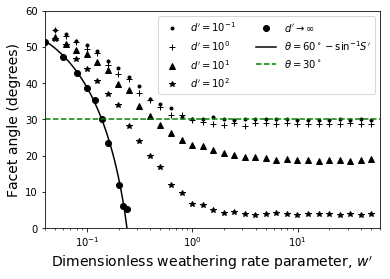

In [20]:
# Plot the weathering + disturbance runs

for d in range(4):
    plt.semilogx(wprime[d,:], facet_angle[d,:], psyms[d])

# Plot the dissolution runs
diss_prime = diss_param * tau
plt.semilogx(diss_prime, diss_facet_angle, 'ko')

# Analytical solution for dissolution only
a = 1.8      # roughness factor, dimensionless
delta = 0.5  # cell width, m
V = 0.001    # slip rate, m/y
wprime_for_diss = 10.0 ** np.arange(-2, -0.6, 0.01)
diss_ang_pred = np.degrees(np.radians(60.0) - np.arcsin(2 * a * wprime_for_diss))
plt.plot(wprime_for_diss, diss_ang_pred, 'k')
plt.ylim([0, 60])

# Angle of repose
ww = np.array([0.04, 60.0])
angrep = np.array([30.0, 30.0])
plt.plot(ww, angrep, 'g--')

# Axis limits
plt.xlim([0.04, 60])

# Labels and legend
plt.xlabel(r"Dimensionless weathering rate parameter, $w'$", fontsize=14)
plt.ylabel('Facet angle (degrees)', fontsize=14)
plt.legend([r"$d'= 10^{-1}$", r"$d'= 10^0$", r"$d'= 10^1$", r"$d'= 10^2$", r"$d' \rightarrow \infty$", r"$\theta = 60^\circ - \sin^{-1}S'$", r"$\theta = 30^\circ$"], ncol=2, fontsize=10)

plt.savefig('facet_angle_vs_wprime.pdf')

Fin.